# Propagation of Hollow Core waveguide



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

In [2]:
loss_min_wl = 5.828070175438596e-06
max_loss_wl = 6.90764472e-06

In [3]:
# A = SlabExact(scale=1e-6, ts=[1e-6, 1e-6, 2e-6, 1e-6, 1e-6],
#               ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 100, 200, 100, 100],
#               symmetric=True, wl=1e-6)

A = SlabExact(scale=1e-5, ts=[6.5e-5, 1e-5, 8e-5, 1e-5, 6.5e-5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
              symmetric=True, wl=max_loss_wl)

TypeError: SlabExact.__init__() got an unexpected keyword argument 'ts'

In [ ]:
b = 1.25
a = 1/ b**2
def quadratic_piecewise(x):
    conds = [(x<-b), ((-b<=x)*(x<=b)), (x>b)]
    funcs = [0, lambda x: 1 - a * x**2, 0]
    return np.piecewise(x, conds, funcs)
    
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)

In [4]:
# Set input function
f0 = quadratic_piecewise

# Set input field type
field_type = 'TE'

NameError: name 'quadratic_piecewise' is not defined

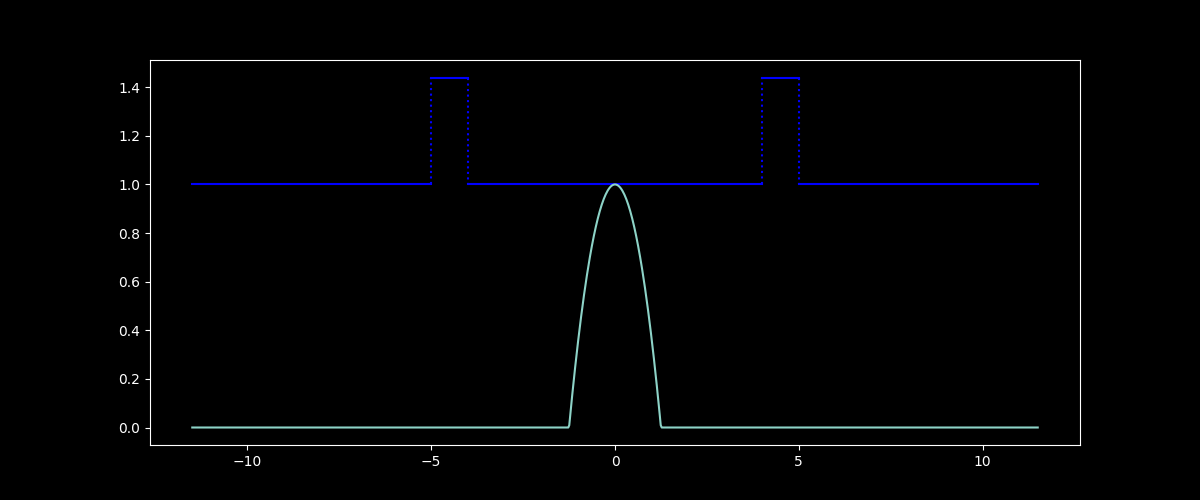

In [11]:
A.plot_refractive_index();
A.add_1d_plot(plt.gca(), f0)

# Add Guided Portion

Based on info below, we found the actual guided mode near K_low

In [12]:
mode_type = 'guided'
k_low = A.K_low

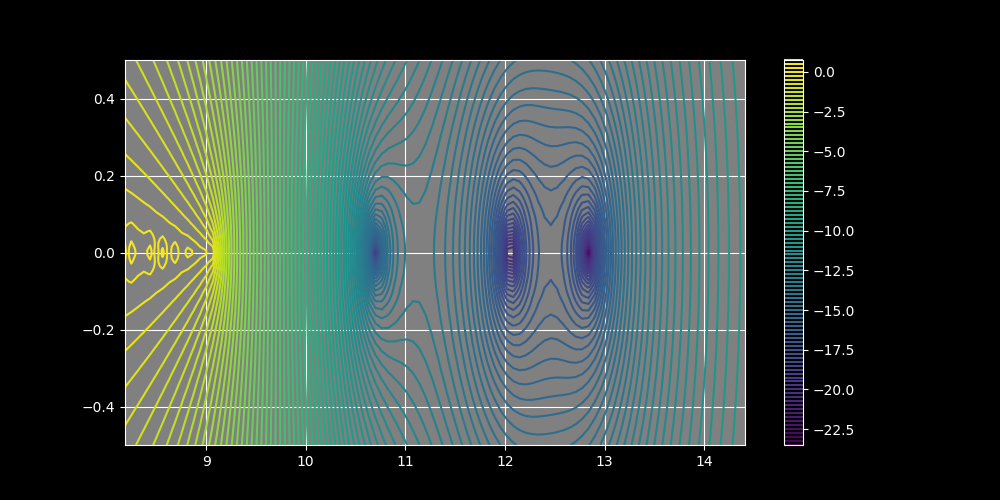

In [13]:
plotlogf(A.determinant, .9*A.K_low, 1.1*A.K_high, -.5, .5, field_type, mode_type, figsize=(10,5),iref=100, rref=100,levels=100)

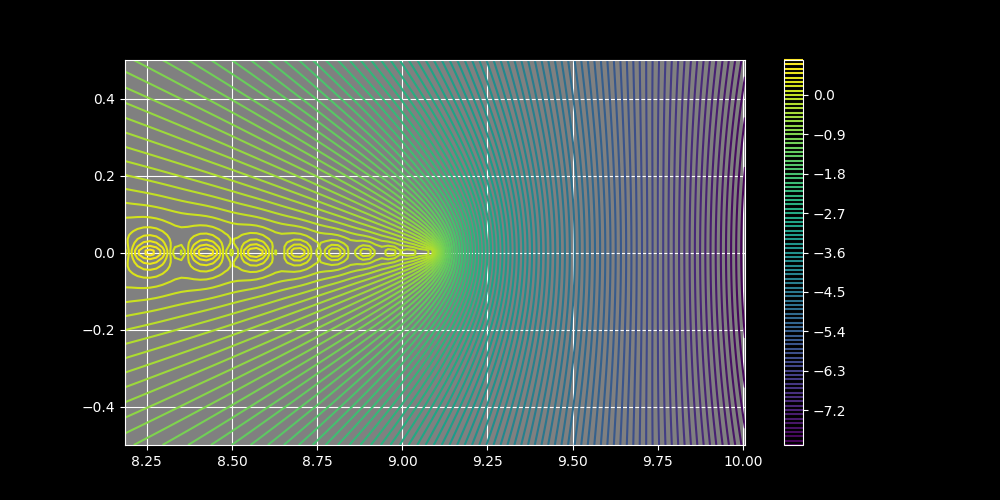

In [14]:
plotlogf(A.determinant, .9*A.K_low, 1.1*A.K_low, -.5, .5, field_type, mode_type, figsize=(10,5),iref=100, rref=100,levels=100)

In [10]:
beta1 = newton(A.determinant, 11.6, args=('TE', mode_type))
print(abs(A.determinant(beta1, 'TE', mode_type)))
beta1

1.849398296642555e-19


(11.66424169948942-1.1734659201906222e-16j)

In [106]:
Fs1 = A.fields(beta1, field_type='TE', mode_type=mode_type)


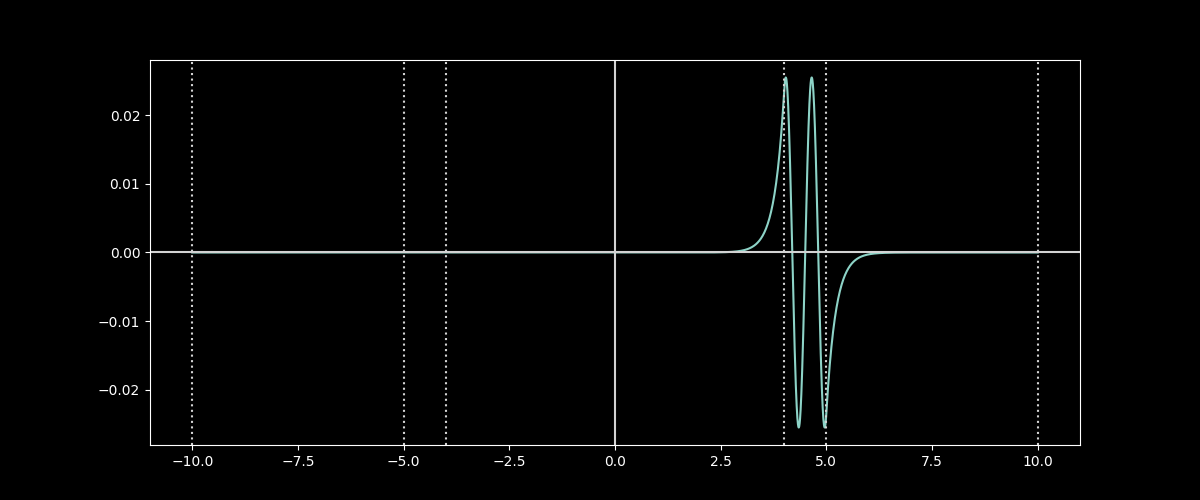

In [107]:
A.plot_field_1d(Fs1)


For non-toy example case, none of the guided modes significantly overlap the input function

## Get coefficient of guided mode

Only for toy example case

In [41]:
from scipy.integrate import quad
integrand = lambda x: Fs1(x) * Fs1(x).conjugate()
cf1 = quad(integrand, -20,20, complex_func=True)[0].real
cf1

0.2018194609211127

In [42]:
integrand = lambda x: f0(x) * Fs1(x).conjugate()
cf2 = quad(integrand, -.5, .5, complex_func=True)[0].real
cf2

0.03016382156348089

In [43]:
alpha = cf2/cf1
alpha

0.14945942985781407

# Propagate Radiation Field

In [15]:
Propagator_Class = A.propagator()

### Propagating Portion

This part takes a lot of resolution in this case

#### Spike 1

In [16]:
P_prop1 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=0.005, RZ=.385, NZ=100, 
                     field_type=field_type, 
                     sign='+1')

0 / 100
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100


In [17]:
P_prop1_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=0.385, RZ=.42, NZ=200, 
                     field_type=field_type, 
                     sign='+1')

0 / 200
1 / 200
2 / 200
3 / 200
4 / 200
5 / 200
6 / 200
7 / 200
8 / 200
9 / 200
10 / 200
11 / 200
12 / 200
13 / 200
14 / 200
15 / 200
16 / 200
17 / 200
18 / 200
19 / 200
20 / 200
21 / 200
22 / 200
23 / 200
24 / 200
25 / 200
26 / 200
27 / 200
28 / 200
29 / 200
30 / 200
31 / 200
32 / 200
33 / 200
34 / 200
35 / 200
36 / 200
37 / 200
38 / 200
39 / 200
40 / 200
41 / 200
42 / 200
43 / 200
44 / 200
45 / 200
46 / 200
47 / 200
48 / 200
49 / 200
50 / 200
51 / 200
52 / 200
53 / 200
54 / 200
55 / 200
56 / 200
57 / 200
58 / 200
59 / 200
60 / 200
61 / 200
62 / 200
63 / 200
64 / 200
65 / 200
66 / 200
67 / 200
68 / 200
69 / 200
70 / 200
71 / 200
72 / 200
73 / 200
74 / 200
75 / 200
76 / 200
77 / 200
78 / 200
79 / 200
80 / 200
81 / 200
82 / 200
83 / 200
84 / 200
85 / 200
86 / 200
87 / 200
88 / 200
89 / 200
90 / 200
91 / 200
92 / 200
93 / 200
94 / 200
95 / 200
96 / 200
97 / 200
98 / 200
99 / 200
100 / 200
101 / 200
102 / 200
103 / 200
104 / 200
105 / 200
106 / 200
107 / 200
108 / 200
109 / 200
110 / 200


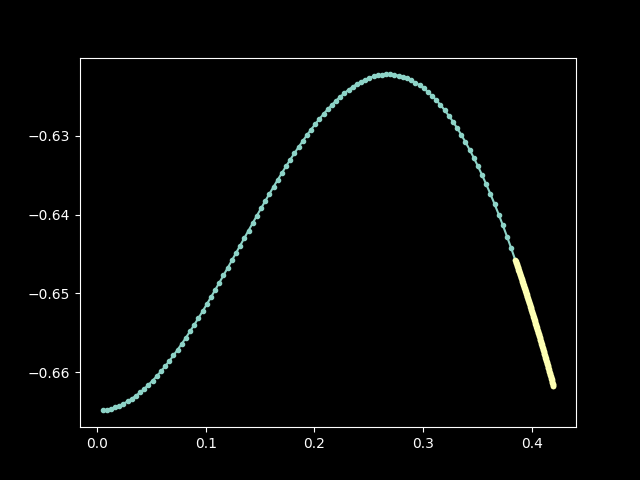

In [18]:
plt.close('all')
plt.plot(P_prop1.Zs, P_prop1.alphas.real, marker='o',markersize=3 );
plt.plot(P_prop1_5.Zs, P_prop1_5.alphas.real, marker='o',markersize=3 );

#### Spike 2

In [19]:
P_prop2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=.42, RZ=1.14, NZ=100, 
                     field_type=field_type, 
                     sign='+1')

0 / 100
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100


In [20]:
P_prop2_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=1.14, RZ=1.3, NZ=100, 
                     field_type=field_type, 
                     sign='+1')

0 / 100
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100


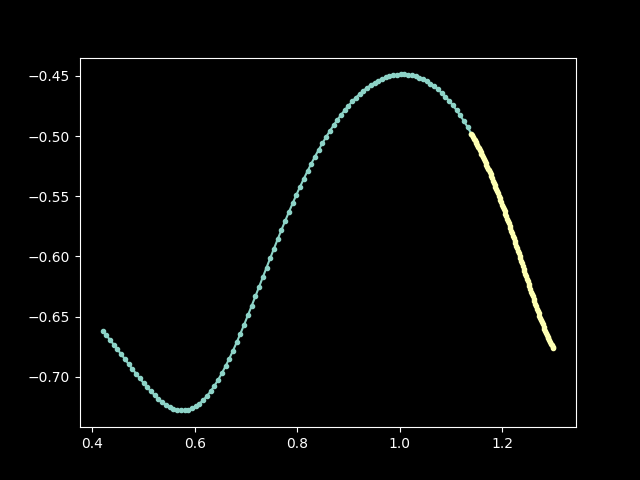

In [21]:
plt.close('all')
plt.plot(P_prop2.Zs, P_prop2.alphas.real, marker='o',markersize=3 );
plt.plot(P_prop2_5.Zs, P_prop2_5.alphas.real, marker='o',markersize=3 );

#### Spike 3

In [22]:
P_prop3 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=1.3, RZ=1.85, NZ=80, 
                     field_type=field_type, 
                     sign='+1')

0 / 80
1 / 80
2 / 80
3 / 80
4 / 80
5 / 80
6 / 80
7 / 80
8 / 80
9 / 80
10 / 80
11 / 80
12 / 80
13 / 80
14 / 80
15 / 80
16 / 80
17 / 80
18 / 80
19 / 80
20 / 80
21 / 80
22 / 80
23 / 80
24 / 80
25 / 80
26 / 80
27 / 80
28 / 80
29 / 80
30 / 80
31 / 80
32 / 80
33 / 80
34 / 80
35 / 80
36 / 80
37 / 80
38 / 80
39 / 80
40 / 80
41 / 80
42 / 80
43 / 80
44 / 80
45 / 80
46 / 80
47 / 80
48 / 80
49 / 80
50 / 80
51 / 80
52 / 80
53 / 80
54 / 80
55 / 80
56 / 80
57 / 80
58 / 80
59 / 80
60 / 80
61 / 80
62 / 80
63 / 80
64 / 80
65 / 80
66 / 80
67 / 80
68 / 80
69 / 80
70 / 80
71 / 80
72 / 80
73 / 80
74 / 80
75 / 80
76 / 80
77 / 80
78 / 80
79 / 80


In [23]:
P_prop3_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=1.85, RZ=2.05, NZ=40, 
                     field_type=field_type, 
                     sign='+1')

0 / 40
1 / 40
2 / 40
3 / 40
4 / 40
5 / 40
6 / 40
7 / 40
8 / 40
9 / 40
10 / 40
11 / 40
12 / 40
13 / 40
14 / 40
15 / 40
16 / 40
17 / 40
18 / 40
19 / 40
20 / 40
21 / 40
22 / 40
23 / 40
24 / 40
25 / 40
26 / 40
27 / 40
28 / 40
29 / 40
30 / 40
31 / 40
32 / 40
33 / 40
34 / 40
35 / 40
36 / 40
37 / 40
38 / 40
39 / 40


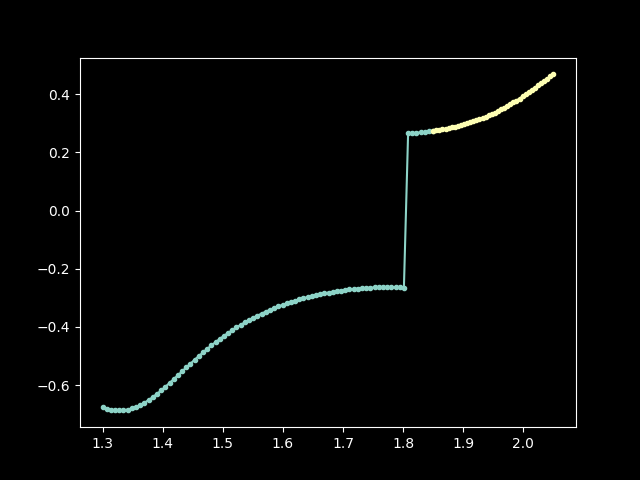

In [24]:
plt.close('all')
plt.plot(P_prop3.Zs, P_prop3.alphas.real, marker='o',markersize=3 );
plt.plot(P_prop3_5.Zs, P_prop3_5.alphas.real, marker='o',markersize=3 );

#### Spike 4

In [25]:
P_prop4 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=2.05, RZ=2.65, NZ=60, 
                     field_type=field_type, 
                     sign='+1')

0 / 60
1 / 60
2 / 60
3 / 60
4 / 60
5 / 60
6 / 60
7 / 60
8 / 60
9 / 60
10 / 60
11 / 60
12 / 60
13 / 60
14 / 60
15 / 60
16 / 60
17 / 60
18 / 60
19 / 60
20 / 60
21 / 60
22 / 60
23 / 60
24 / 60
25 / 60
26 / 60
27 / 60
28 / 60
29 / 60
30 / 60
31 / 60
32 / 60
33 / 60
34 / 60
35 / 60
36 / 60
37 / 60
38 / 60
39 / 60
40 / 60
41 / 60
42 / 60
43 / 60
44 / 60
45 / 60
46 / 60
47 / 60
48 / 60
49 / 60
50 / 60
51 / 60
52 / 60
53 / 60
54 / 60
55 / 60
56 / 60
57 / 60
58 / 60
59 / 60


In [26]:
P_prop4_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=2.65, RZ=2.8, NZ=60, 
                     field_type=field_type, 
                     sign='+1')

0 / 60
1 / 60
2 / 60
3 / 60
4 / 60
5 / 60
6 / 60
7 / 60
8 / 60
9 / 60
10 / 60
11 / 60
12 / 60
13 / 60
14 / 60
15 / 60
16 / 60
17 / 60
18 / 60
19 / 60
20 / 60
21 / 60
22 / 60
23 / 60
24 / 60
25 / 60
26 / 60
27 / 60
28 / 60
29 / 60
30 / 60
31 / 60
32 / 60
33 / 60
34 / 60
35 / 60
36 / 60
37 / 60
38 / 60
39 / 60
40 / 60
41 / 60
42 / 60
43 / 60
44 / 60
45 / 60
46 / 60
47 / 60
48 / 60
49 / 60
50 / 60
51 / 60
52 / 60
53 / 60
54 / 60
55 / 60
56 / 60
57 / 60
58 / 60
59 / 60


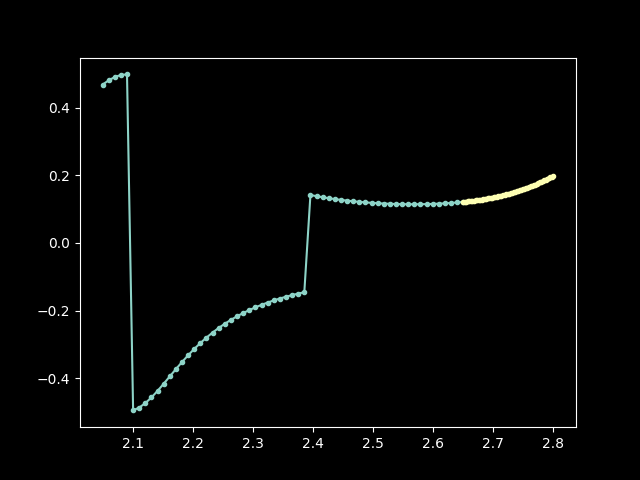

In [27]:
plt.close('all')
plt.plot(P_prop4.Zs, P_prop4.alphas.real, marker='o',markersize=3 );
plt.plot(P_prop4_5.Zs, P_prop4_5.alphas.real, marker='o',markersize=3 );

#### Spike 5

In [31]:
P_prop5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=2.8, RZ=3.42, NZ=100, 
                     field_type=field_type, 
                     sign='+1')

0 / 100
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100


In [32]:
P_prop5_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=3.42, RZ=3.52, NZ=40, 
                     field_type=field_type, 
                     sign='+1')

0 / 40
1 / 40
2 / 40
3 / 40
4 / 40
5 / 40
6 / 40
7 / 40
8 / 40
9 / 40
10 / 40
11 / 40
12 / 40
13 / 40
14 / 40
15 / 40
16 / 40
17 / 40
18 / 40
19 / 40
20 / 40
21 / 40
22 / 40
23 / 40
24 / 40
25 / 40
26 / 40
27 / 40
28 / 40
29 / 40
30 / 40
31 / 40
32 / 40
33 / 40
34 / 40
35 / 40
36 / 40
37 / 40
38 / 40
39 / 40


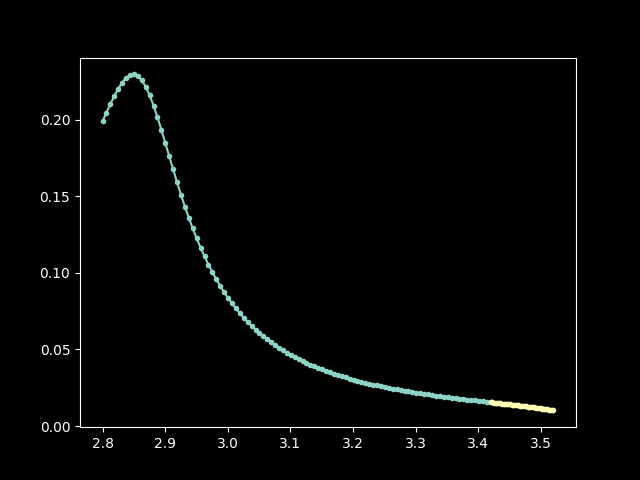

In [33]:
plt.close('all')
plt.plot(P_prop5.Zs, P_prop5.alphas.real, marker='o',markersize=3 );
plt.plot(P_prop5_5.Zs, P_prop5_5.alphas.real, marker='o',markersize=3 );

#### Spike 6 and rest of propagating portion

In [39]:
P_prop6 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=3.52, RZ=4.5, NZ=120, 
                     field_type=field_type, 
                     sign='+1')

0 / 120
1 / 120
2 / 120
3 / 120
4 / 120
5 / 120
6 / 120
7 / 120
8 / 120
9 / 120
10 / 120
11 / 120
12 / 120
13 / 120
14 / 120
15 / 120
16 / 120
17 / 120
18 / 120
19 / 120
20 / 120
21 / 120
22 / 120
23 / 120
24 / 120
25 / 120
26 / 120
27 / 120
28 / 120
29 / 120
30 / 120
31 / 120
32 / 120
33 / 120
34 / 120
35 / 120
36 / 120
37 / 120
38 / 120
39 / 120
40 / 120
41 / 120
42 / 120
43 / 120
44 / 120
45 / 120
46 / 120
47 / 120
48 / 120
49 / 120
50 / 120
51 / 120
52 / 120
53 / 120
54 / 120
55 / 120
56 / 120
57 / 120
58 / 120
59 / 120
60 / 120
61 / 120
62 / 120
63 / 120
64 / 120
65 / 120
66 / 120
67 / 120
68 / 120
69 / 120
70 / 120
71 / 120
72 / 120
73 / 120
74 / 120
75 / 120
76 / 120
77 / 120
78 / 120
79 / 120
80 / 120
81 / 120
82 / 120
83 / 120
84 / 120
85 / 120
86 / 120
87 / 120
88 / 120
89 / 120
90 / 120
91 / 120
92 / 120
93 / 120
94 / 120
95 / 120
96 / 120
97 / 120
98 / 120
99 / 120
100 / 120
101 / 120
102 / 120
103 / 120
104 / 120
105 / 120
106 / 120
107 / 120
108 / 120
109 / 120
110 / 120


In [37]:
P_prop7 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=4.5, RZ=A.Z_evanescent.real, NZ=300, 
                     field_type=field_type, 
                     sign='+1')

0 / 300
1 / 300
2 / 300
3 / 300
4 / 300
5 / 300
6 / 300
7 / 300
8 / 300
9 / 300
10 / 300
11 / 300
12 / 300
13 / 300
14 / 300
15 / 300
16 / 300
17 / 300
18 / 300
19 / 300
20 / 300
21 / 300
22 / 300
23 / 300
24 / 300
25 / 300
26 / 300
27 / 300
28 / 300
29 / 300
30 / 300
31 / 300
32 / 300
33 / 300
34 / 300
35 / 300
36 / 300
37 / 300
38 / 300
39 / 300
40 / 300
41 / 300
42 / 300
43 / 300
44 / 300
45 / 300
46 / 300
47 / 300
48 / 300
49 / 300
50 / 300
51 / 300
52 / 300
53 / 300
54 / 300
55 / 300
56 / 300
57 / 300
58 / 300
59 / 300
60 / 300
61 / 300
62 / 300
63 / 300
64 / 300
65 / 300
66 / 300
67 / 300
68 / 300
69 / 300
70 / 300
71 / 300
72 / 300
73 / 300
74 / 300
75 / 300
76 / 300
77 / 300
78 / 300
79 / 300
80 / 300
81 / 300
82 / 300
83 / 300
84 / 300
85 / 300
86 / 300
87 / 300
88 / 300
89 / 300
90 / 300
91 / 300
92 / 300
93 / 300
94 / 300
95 / 300
96 / 300
97 / 300
98 / 300
99 / 300
100 / 300
101 / 300
102 / 300
103 / 300
104 / 300
105 / 300
106 / 300
107 / 300
108 / 300
109 / 300
110 / 300


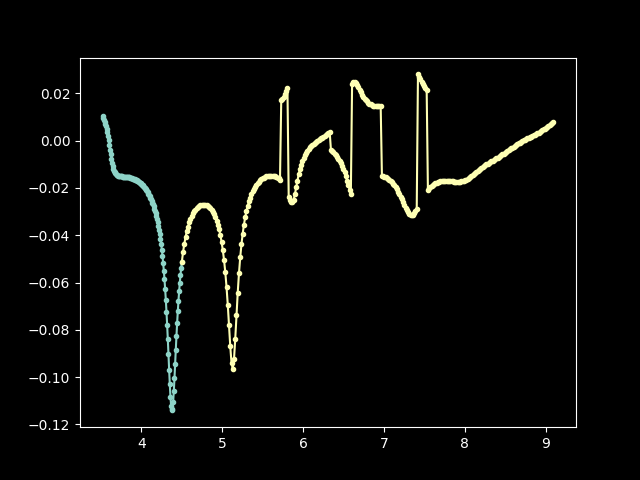

In [40]:
plt.close('all')
plt.plot(P_prop6.Zs, P_prop6.alphas.real, marker='o',markersize=3 );
plt.plot(P_prop7.Zs, P_prop7.alphas.real, marker='o',markersize=3 );

### Evanescent Portion

In [41]:
P_ev = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=A.Z_evanescent.real, RZ=14, NZ=100, 
                     field_type=field_type, 
                     sign='+1')

0 / 100
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100


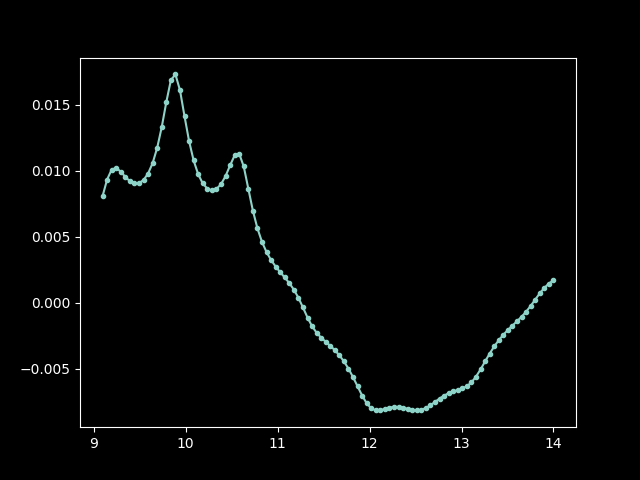

In [42]:
plt.close('all')
plt.plot(P_ev.Zs, P_ev.alphas.real,  marker='o',markersize=3 );

In [43]:
P_ev2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
                     LZ=14, RZ=2*A.Z_evanescent.real, NZ=100, 
                     field_type=field_type, 
                     sign='+1')

0 / 100
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100


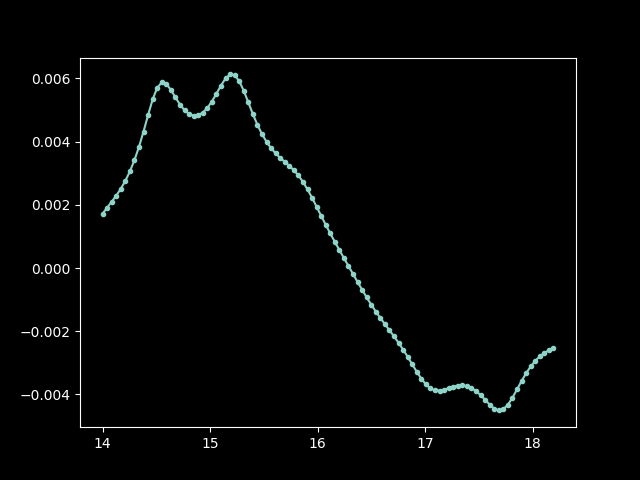

In [44]:
plt.close('all')
plt.plot(P_ev2.Zs, P_ev2.alphas.real, marker='o',markersize=3) ;

# Cross sections at input


In [45]:
propfuncs = [ P_prop1, 
             P_prop1_5, 
             P_prop2, 
             P_prop2_5, 
             P_prop3, 
             P_prop3_5, 
             P_prop4, 
             P_prop4_5, 
             P_prop5, 
             P_prop5_5, 
             P_prop6, 
             P_prop7,
            ]
evfuncs = [P_ev, 
           P_ev2]

In [46]:
prop = lambda x: sum([f.slice_propagate(x) for f in propfuncs])
ev = lambda x: sum([f.slice_propagate(x) for f in evfuncs]) 
full = lambda x: prop(x) + ev(x)

In [47]:
xs = np.linspace(-3, 3, 2000)

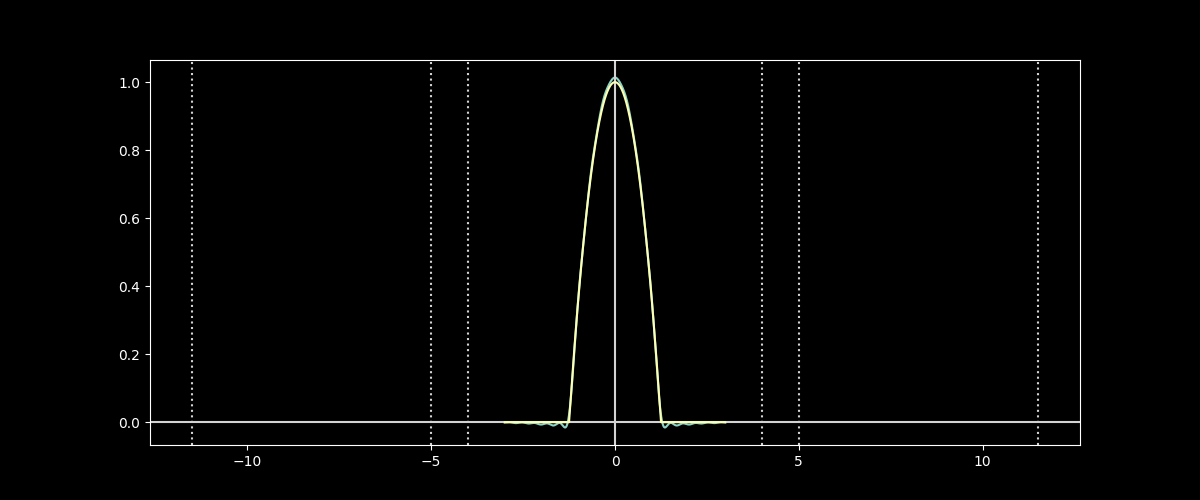

In [48]:
A.plot_field_1d(full, xs=xs) 
A.add_1d_plot(plt.gca(), f0, xs=xs)
# plt.gca().set_xlim(-3,3)

# 2D Plots

In [49]:
Prop = lambda x, z: sum([f.propagate(x, zs=z) for f in propfuncs])
Ev = lambda x, z: sum([f.propagate(x, zs=z) for f in evfuncs]) 
Full = lambda x, z: Prop(x, z) + Ev(x, z)

In [50]:
# Full = lambda x, z : P_prop1.propagate(x, zs=z) + P_prop1.propagate(x, zs=z)  + P_ev.propagate(x, zs=z) + P_ev2.propagate(x, zs=z)
# Full = lambda x, z: sum([f.propagate(x, zs=z) for f in propfuncs])

In [55]:
# Setting Xs, useful to differentiate resolution between regions
A = SlabExact(scale=1e-5, ts=[15e-5, 1e-5, 8e-5, 1e-5, 15e-5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 15, 120, 15, 100],
              symmetric=True, wl=max_loss_wl)

In [56]:
xs = A.all_Xs

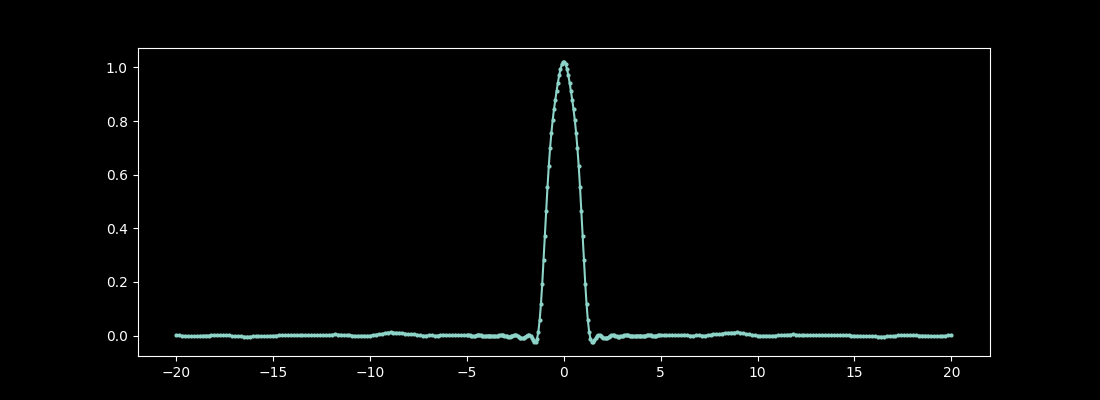

In [57]:
plt.close('all')
fig = plt.figure(1, figsize=(11,4))
plt.plot(xs, prop(xs).real, marker='o', markersize=2);

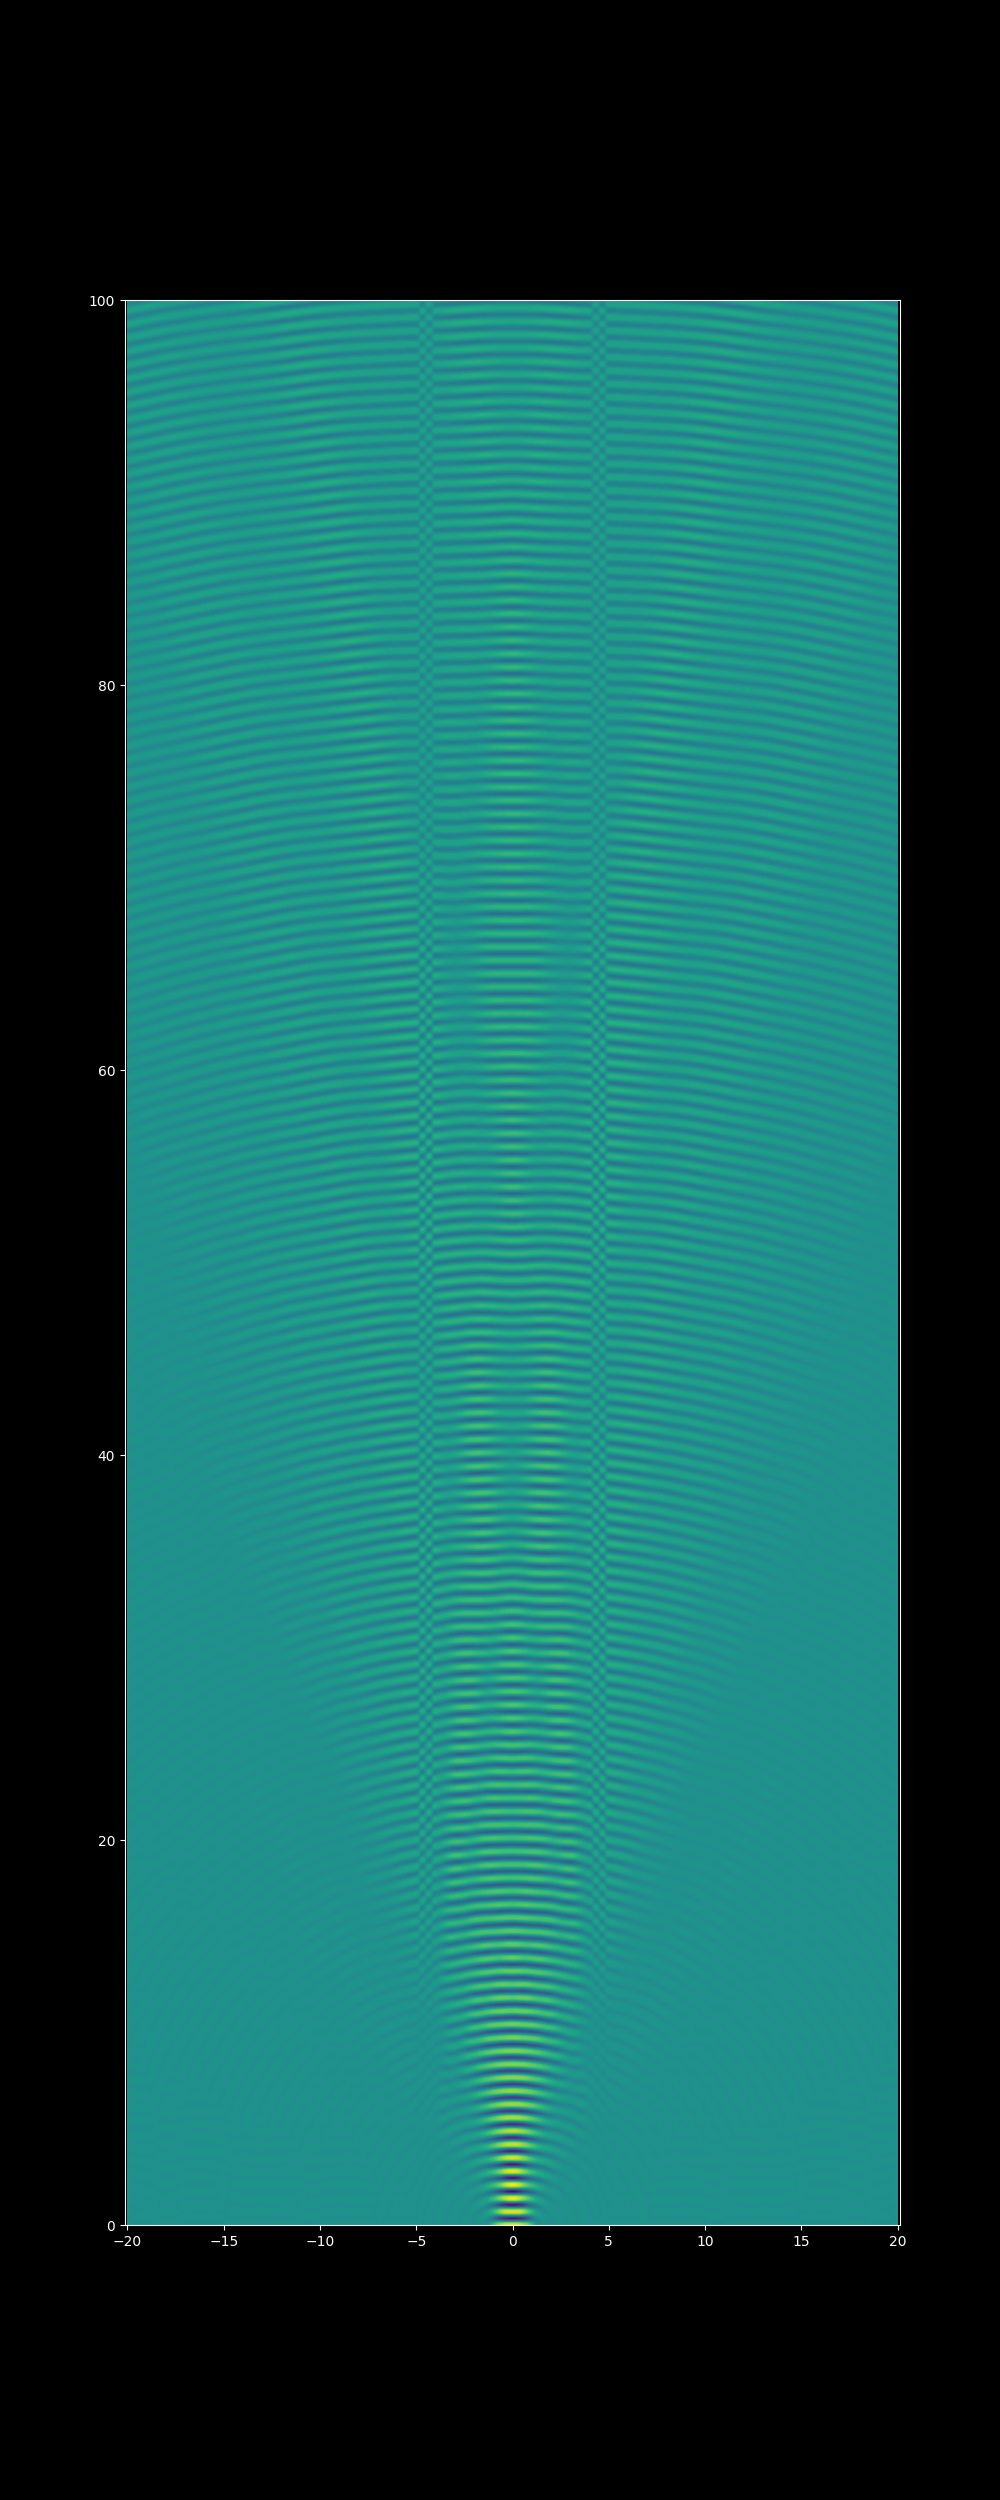

In [77]:
# Good ratio for z is 40 points per 3 units (so about 13 points per unit)
A.plot_field_2d(Full, xs=xs, colorbar=False,
                zmax=100, zref=int(100*40/3), figwidth=10,
               )
plt.axis('equal');

# Surface Plot

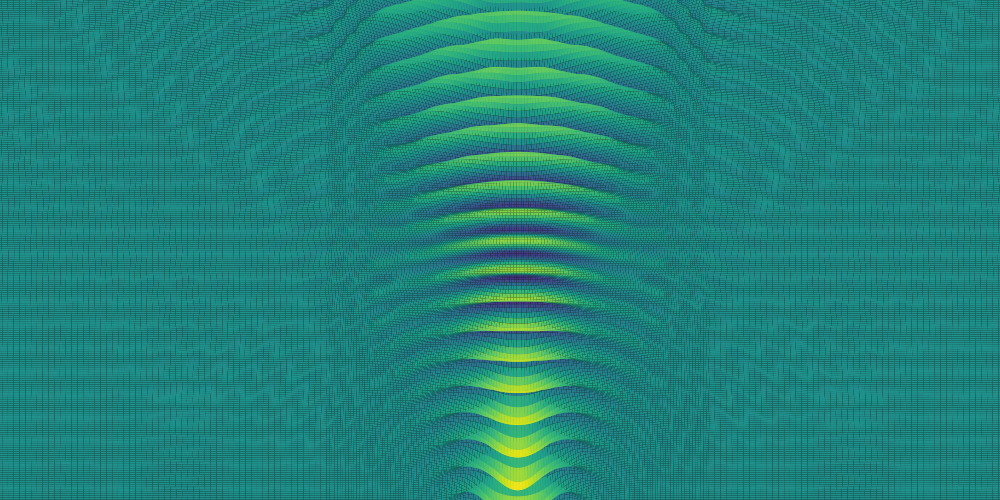

In [61]:
A.plot_field_2d(Full, surface=True, xs=xs, colorbar=False, zoom=5,
                azim=-90, elev=90, zmin=0,
                zmax=15, zref=int(15*40/2),
                rstride=1, cstride=1,
               )

# Save data for visualization


In [78]:
xs = A.all_Xs
zs = np.linspace(0, 100, int(100*40/2))

In [79]:
f0s = f0(xs)

In [80]:
rad_ys_propagating = Prop(xs, zs)


In [81]:
rad_ys_evanescent = Ev(xs, zs)


In [82]:
# guided_ys = alpha * Fs1(xs, zs=zs)

In [83]:
Xs, Zs = np.meshgrid(xs, zs)

In [84]:
def get_trig_indices(mesh_array):
    '''Get triangle index list for three js mesh formation via indexed buffer geometry.'''
    if len(mesh_array.shape) <= 1:
        raise ValueError('Provide meshgrid array as input.')
    Nz, Nx = mesh_array.shape[0], mesh_array.shape[1]
    l_inds = Nx * Nz
    indices =  np.arange(0, l_inds).reshape((Nx, Nz)).T  # Note transpose
    fbases = indices[:Nz-1, :Nx-1].T.flatten()  # Note transpose and index switch due to transpose
    f1 = np.array([[i, i+Nz, i+1] for i in fbases], dtype=int)
    f2 = np.array([[i+1, i+Nz, i+Nz+1] for i in fbases], dtype=int)
    return np.concatenate((f1, f2))


def get_base_vertices(Xs, Zs):
    '''Get vertices of triangles with zero height (y component in three.js).'''
    if Xs.shape != Zs.shape:
        raise ValueError('Provide meshgrid arrays (ie Xs, Zs = np.meshgrid(xs,zs)) as inputs.')
    Base = np.array([Xs, np.zeros_like(Xs), Zs], dtype=float)
    L = Xs.shape[0] * Xs.shape[1]
    base_vertices = Base.T.reshape((L,3))
    return base_vertices


def create_height_array_from_complex(ys, Xs):
    '''Get data for height from complex ys input (needs to be formatted as list:
        [ys[0].real, ys[0].imag, ys[1].real, ys[1].imag, ... ].'''
    L = Xs.shape[0] * Xs.shape[1]
    Ys = np.array([ys.real, ys.imag], dtype=float)
    heights = Ys.T.reshape((L,2))
    return heights


def save_trig_indices_as_json(filepath, mesh_array):
    indices = get_trig_indices(mesh_array)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(indices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


def save_base_vertices_as_json(filepath, Xs, Zs):
    base_vertices = get_base_vertices(Xs, Zs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(base_vertices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)
        

def save_heights_as_json(filepath, ys, Xs):
    heights= create_height_array_from_complex(ys, Xs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(heights.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)

def save_values_as_json(filepath, f0s):
    with open(filepath + '.json', 'w') as outfile:
        json.dump(f0s.tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


In [85]:
prefix='/home/pv/local/slab/apps/resonant/'

In [86]:
save_trig_indices_as_json(prefix + 'trig_indices_new', Xs)

In [87]:
save_base_vertices_as_json(prefix + 'base_vertices_new', Xs, Zs)

In [88]:
# save_heights_as_json(prefix + 'guided_heights', guided_ys, Xs)

In [89]:
save_heights_as_json(prefix + 'evanescent_heights', rad_ys_evanescent, Xs)

In [90]:
save_heights_as_json(prefix + 'propagating_heights', rad_ys_propagating, Xs)

In [91]:
save_values_as_json(prefix + 'f0s', f0s)

In [92]:
save_values_as_json(prefix + 'x0s', xs)